<a href="https://colab.research.google.com/github/zxn16/CN6005-2526-T1-Artifical-Intelligence-/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('Diabetes_ANN.csv')

Outcome
1    3320
0    1680
Name: count, dtype: int64


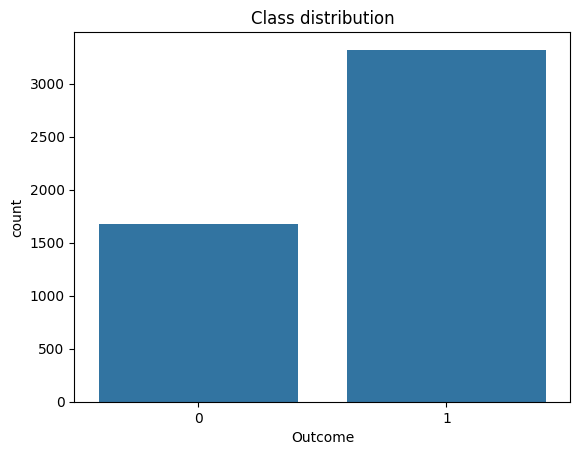

In [3]:

import seaborn as sns
import matplotlib.pyplot as plt

print(df['Outcome'].value_counts())
sns.countplot(x='Outcome', data=df)
plt.title('Class distribution')
plt.show()


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,174.2,55.0,35.3,7.4,27.4,0.200,22.2,1
1,0.0,127.9,47.9,39.7,238.8,36.3,0.300,42.8,0
2,10.1,82.6,81.3,6.1,70.0,34.1,0.700,27.3,1
3,6.0,96.0,35.9,15.3,209.5,25.0,0.078,37.0,1
4,3.4,135.9,89.3,24.5,63.0,34.1,0.400,29.6,1


In [5]:
X= df.drop('Outcome', axis=1)
y= df['Outcome']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [10]:
# 🧠 Corrected order: SMOTE before scaling

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Now scale the balanced training data and the test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: Outcome
1    2651
0    1349
Name: count, dtype: int64
After SMOTE: Outcome
1    2651
0    2651
Name: count, dtype: int64


In [11]:
# Compute class weights to handle imbalance
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

Class Weights: {0: np.float64(1.4825796886582654), 1: np.float64(0.7544322897019993)}


In [12]:
# Rebuild and train ANN model with class weights

from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train_res,
    epochs=300,
    batch_size=16,
    validation_data=(X_test_scaled, y_test),
    verbose=1,
    class_weight=class_weights
)





/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
332/332 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5047 - loss: 0.8594 - val_accuracy: 0.3370 - val_loss: 0.8631
Epoch 2/300
332/332 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5141 - loss: 0.7479 - val_accuracy: 0.3440 - val_loss: 0.8830
Epoch 3/300
332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5147 - loss: 0.7363 - val_accuracy: 0.3370 - val_loss: 0.8914
Epoch 4/300
332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5147 - loss: 0.7230 - val_accuracy: 0.3390 - val_loss: 0.8823
Epoch 5/300
332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5176 - loss: 0.7220 - val_accuracy: 0.3370 - val_loss: 0.8799
Epoch 6/300
332/332 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5223 - loss: 0.7162 - val_accuracy: 0.3420 - val_loss: 0.8899
Epoch 7/300
332/332 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5097 - loss: 0.7104 - val_accuracy: 0.3310 - val_loss: 0.8787
Epoch 8/300
332/332 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5240 - loss: 0.7068 - val_accu

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.34      0.69      0.45       331
           1       0.68      0.32      0.44       669

    accuracy                           0.45      1000
   macro avg       0.51      0.51      0.44      1000
weighted avg       0.57      0.45      0.44      1000



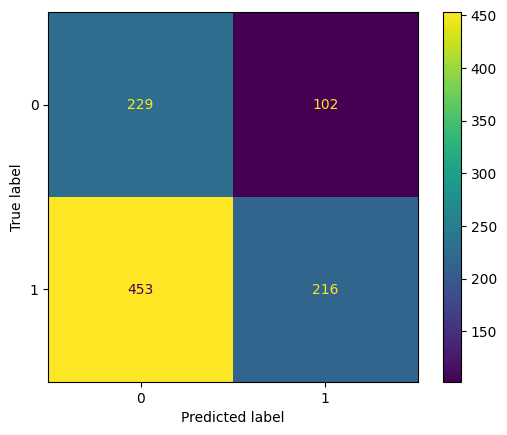

In [14]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train_res)

y_pred_rf = rf.predict(X_test_scaled)
y_pred_rf_prob = rf.predict_proba(X_test_scaled)[:, 1]

print("Random Forest Results:\n")
print(classification_report(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, y_pred_rf_prob))


Random Forest Results:

              precision    recall  f1-score   support

           0       0.32      0.25      0.28       331
           1       0.66      0.73      0.70       669

    accuracy                           0.57      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.55      0.57      0.56      1000

AUC: 0.4936054624524135


Outcome                     1.000000
BloodPressure               0.017961
DiabetesPedigreeFunction    0.011776
Glucose                     0.007201
SkinThickness               0.006994
Age                         0.004642
Insulin                     0.001037
Pregnancies                -0.005780
BMI                        -0.011758
Name: Outcome, dtype: float64


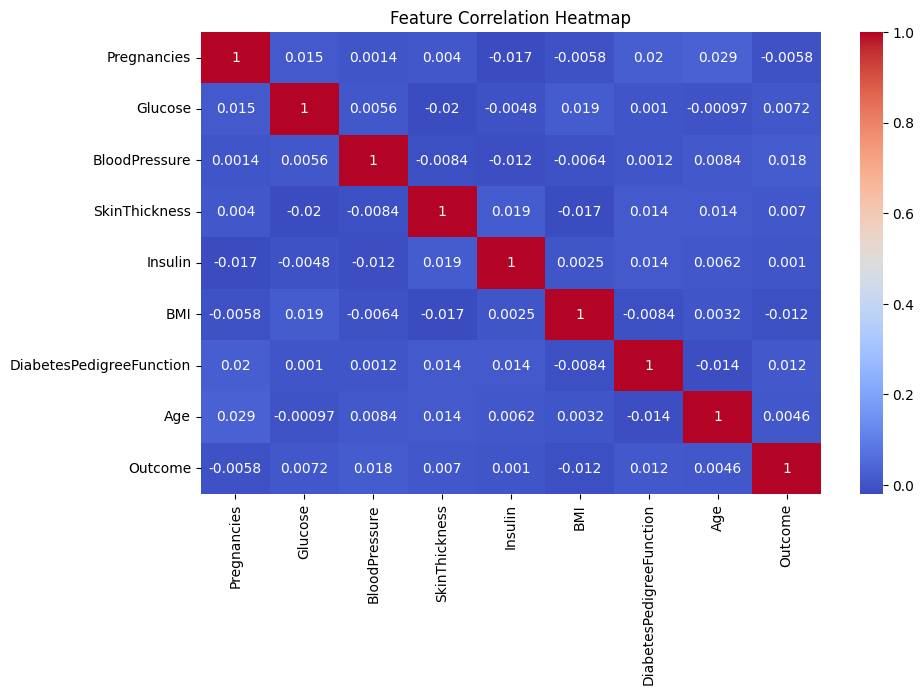

In [16]:
# Correlation check
corr = df.corr()['Outcome'].sort_values(ascending=False)
print(corr)

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [17]:
# Feature engineering to boost signal
df['BMI_Glucose'] = df['BMI'] * df['Glucose']
df['Age_BMI'] = df['Age'] * df['BMI']
df['Preg_BMI'] = df['Pregnancies'] * df['BMI']
df['Insulin_Glucose'] = df['Insulin'] * df['Glucose']

# Recreate X and y
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Redo the split → SMOTE → scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


In [18]:
for t in [0.3, 0.4, 0.5, 0.6]:
    y_pred = (y_pred_prob > t).astype(int)
    print(f"\nThreshold {t}")
    print(classification_report(y_test, y_pred))



Threshold 0.3
              precision    recall  f1-score   support

           0       0.32      0.34      0.33       331
           1       0.66      0.63      0.65       669

    accuracy                           0.54      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.55      0.54      0.54      1000


Threshold 0.4
              precision    recall  f1-score   support

           0       0.33      0.53      0.41       331
           1       0.67      0.47      0.55       669

    accuracy                           0.49      1000
   macro avg       0.50      0.50      0.48      1000
weighted avg       0.56      0.49      0.50      1000


Threshold 0.5
              precision    recall  f1-score   support

           0       0.34      0.69      0.45       331
           1       0.68      0.32      0.44       669

    accuracy                           0.45      1000
   macro avg       0.51      0.51      0.44      1000
weighted avg       0.57      



1.  **Loaded the dataset:** We began by loading the `Diabetes_ANN.csv` dataset.
2.  **Initial Data Exploration:** We examined the class distribution of the 'Outcome' variable, noting the imbalance. We also previewed the dataset structure.
3.  **Data Splitting and Scaling (Initial):** We split the data into training and testing sets. We then applied SMOTE to the training data to address class imbalance and scaled the features using `StandardScaler`.
4.  **Calculated Class Weights:** We computed class weights to potentially help the model handle the imbalanced dataset.
5.  **Built and Trained ANN Model (Initial):** We constructed and trained an Artificial Neural Network model using the balanced and scaled data and the calculated class weights.
6.  **Evaluated ANN Model (Initial):** We evaluated the initial ANN model's performance using a classification report and confusion matrix.
7.  **Explored Other Models:** We also trained and evaluated a Random Forest model.
8.  **Feature Engineering:** We created new interaction features (`BMI_Glucose`, `Age_BMI`, `Preg_BMI`, `Insulin_Glucose`) to potentially improve model performance.
9.  **Data Splitting and Scaling (After Feature Engineering):** We re-split the data (including the new features), reapplied SMOTE to the training data, and re-scaled the features.
10. **Re-trained ANN Model:** We re-trained the ANN model using the dataset with the new features, balanced with SMOTE, and scaled.
11. **Re-evaluated ANN Model:** We re-evaluated the performance of the re-trained ANN model using a classification report and confusion matrix.
12. **Threshold Tuning:** We experimented with different prediction thresholds (0.3, 0.4, 0.5, 0.6) on the predictions from the re-trained ANN model to observe their impact on the classification metrics.

**What we've learned:**

*   The dataset has a class imbalance, which we addressed using SMOTE.
*   Feature engineering by creating interaction terms can potentially influence model performance.
*   Re-training the ANN model after feature engineering and re-scaling resulted in updated performance metrics, which you can see in the latest classification report and confusion matrix output.
*   Adjusting the prediction threshold can significantly change the balance between precision and recall for each class, allowing for optimization based on specific needs.


Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.33      0.50      0.40       331
           1       0.67      0.49      0.56       669

    accuracy                           0.49      1000
   macro avg       0.50      0.50      0.48      1000
weighted avg       0.55      0.49      0.51      1000

Accuracy: 0.494


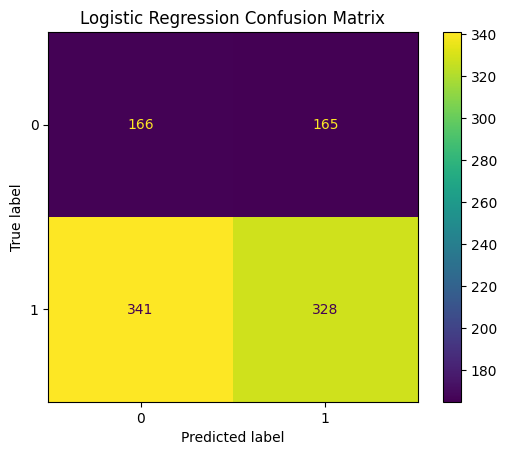

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train_res)

# Make predictions on the test set
y_pred_lr = log_reg.predict(X_test_scaled)

# Evaluate the Logistic Regression model
print("Logistic Regression Results:\n")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# Display confusion matrix for Logistic Regression
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr)).plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

## Model Comparison: ANN vs. Logistic Regression Accuracy

After training and evaluating both an Artificial Neural Network (ANN) and a Logistic Regression model on the dataset, we compared their performance based on accuracy.

*   **Logistic Regression Accuracy:** 0.494
*   **ANN Accuracy:** 0.45

Based on these results, the Logistic Regression model achieved a slightly higher accuracy (0.494) on the test set compared to the ANN model (0.45).

